**job_id**: Unique Job ID  
**title**: The title of the job ad entry  
**location**: Geographical location of the job ad  
**department**: Corporate department (e.g. sales)  
**salary_range**: Indicative salary range (e.g. \\$50,000-\\$60,000)  
**company_profile**: A brief company description  
**description**: The details description of the job ad  
**requirements**: Enlisted requirements for the job opening  
**benefits**: Enlisted offered benefits by the employer  
**telecommuting**: True for telecommuting positions  
**hascompanylogo**: True if company logo is present  
**has_questions**: True if screening questions are present  
**employment_type**: Full-type, Part-time, Contract, etc  
**required_experience**: Executive, Entry level, Intern, etc  
**required_education**: Doctorate, Master’s Degree, Bachelor, etc  
**industry**: Automotive, IT, Health care, Real estate, etc  
**function**: Consulting, Engineering, Research, Sales etc  
**fraudulent**: target - Classification attribute  

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Processing

In [2]:
# Loading data into dataframe
job_data = pd.read_csv('dataset/fake_job_postings.csv')

In [3]:
# First 5 rows
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Number of rows and columns
job_data.shape

(17880, 18)

In [5]:
job_data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking type of data
job_data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [7]:
# Checking missing values
job_data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

**For simplicity we are going to consider only the columns that seem more relevant and those will be:
title, location, company_profile, description, requirements, benefits, has_questions, employment_type, required_experience and requiered_education**

In [8]:
job_data_filtered_columns = job_data.drop(columns=['job_id', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 'industry', 'function'], axis=1)

In [9]:
job_data_filtered_columns.head()

,title,location,company_profile,description,requirements,benefits,has_questions,employment_type,required_experience,required_education,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,Other,Internship,NaN,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Not Applicable,NaN,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,0


**The NaN will be replaced with empty strings**

In [10]:
clean_job_data = job_data_filtered_columns.where((pd.notnull(job_data)), '')

In [11]:
clean_job_data.isna().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
has_questions          0
employment_type        0
required_experience    0
required_education     0
fraudulent             0
dtype: int64

In [12]:
clean_job_data.head()

,title,location,company_profile,description,requirements,benefits,has_questions,employment_type,required_experience,required_education,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,Other,Internship,,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Not Applicable,,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,0


**For location, only the country will be considered**

In [13]:
def get_country(location):
    return location.split(',')[0]

In [14]:
clean_job_data['location'] = clean_job_data.location.apply(get_country)

In [15]:
clean_job_data.head()

,title,location,company_profile,description,requirements,benefits,has_questions,employment_type,required_experience,required_education,fraudulent
0,Marketing Intern,US,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,Other,Internship,,0
1,Customer Service - Cloud Video Production,NZ,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Not Applicable,,0
2,Commissioning Machinery Assistant (CMA),US,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,,,,0
3,Account Executive - Washington DC,US,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,Bill Review Manager,US,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [16]:
clean_job_data.dtypes

title                  object
location               object
company_profile        object
description            object
requirements           object
benefits               object
has_questions           int64
employment_type        object
required_experience    object
required_education     object
fraudulent              int64
dtype: object

In [17]:
# has_questions will be converted to string
clean_job_data['has_questions'] = clean_job_data['has_questions'].astype(str)

In [18]:
clean_job_data.dtypes

title                  object
location               object
company_profile        object
description            object
requirements           object
benefits               object
has_questions          object
employment_type        object
required_experience    object
required_education     object
fraudulent              int64
dtype: object

**A column with the text of all the features will be created to be used as X**

In [19]:
clean_job_data['text'] = clean_job_data['title'] + ' - ' + clean_job_data['location'] + ' - ' + clean_job_data['company_profile'] + ' - ' + clean_job_data['description'] + ' - ' + clean_job_data['requirements'] +  ' - ' + clean_job_data['benefits'] + ' - ' + clean_job_data['has_questions'] + ' - ' + clean_job_data['employment_type'] + ' - ' + clean_job_data['required_experience'] + ' - ' + clean_job_data['required_education']

In [20]:
clean_job_data.head()

,title,location,company_profile,description,requirements,benefits,has_questions,employment_type,required_experience,required_education,fraudulent,text
0,Marketing Intern,US,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,Other,Internship,,0,"Marketing Intern - US - We're Food52, and we'v..."
1,Customer Service - Cloud Video Production,NZ,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Not Applicable,,0,Customer Service - Cloud Video Production - NZ...
2,Commissioning Machinery Assistant (CMA),US,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,,,,0,Commissioning Machinery Assistant (CMA) - US -...
3,Account Executive - Washington DC,US,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Full-time,Mid-Senior level,Bachelor's Degree,0,Account Executive - Washington DC - US - Our p...
4,Bill Review Manager,US,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,0,Bill Review Manager - US - SpotSource Solution...


## Checking Label Column Value Distribution

In [21]:
# Checking value on Fraudulent column
clean_job_data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

0 $\longrightarrow$ True Job Offer  
1 $\longrightarrow$ Fake Job Offer

## Undersampling

In [25]:
fake_sample = clean_job_data.loc[clean_job_data['fraudulent'] == 1]
fake_sample.shape

(866, 12)

In [27]:
true_offers =  clean_job_data.loc[clean_job_data['fraudulent'] == 0]
true_offers.shape

(17014, 12)

In [28]:
true_sample = true_offers.sample(n=866)
true_sample.shape

(866, 12)

In [29]:
true_sample.head()

,title,location,company_profile,description,requirements,benefits,has_questions,employment_type,required_experience,required_education,fraudulent,text
5171,Referrals Specialist,US,,Essential Duties: 1.Process specialty referral...,Qualifications: 1.Minimum 1 year experience wi...,,0,Full-time,,,0,Referrals Specialist - US - - Essential Dutie...
3526,Investor Relations Analyst,US,Valor Services provides Workforce Solutions th...,This is a fantastic opportunity to join a high...,"Education: Bachelor’s degree in a finance, acc...",,1,Full-time,Associate,,0,Investor Relations Analyst - US - Valor Servic...
4618,Part-Time Provisions Sourcing Associate,US,"We're Food52, and we've created a groundbreaki...",Do you obsess over great products -- both styl...,You may be a good fit for this position if you...,,1,Part-time,Associate,,0,Part-Time Provisions Sourcing Associate - US -...
15514,Database Administrator & BI Developer,EG,Thanks for visiting our Job Board. Please revi...,Role SummaryDBA is responsible for the perform...,"Bachelor’s degree in MIS, Computer Science, or...",Attractive pay packageMobile allowanceTranspor...,0,Full-time,Mid-Senior level,Bachelor's Degree,0,Database Administrator & BI Developer - EG - ...
12849,Inventory Taker 11/hr to start,US,,PICS is hiring dependable team members and lea...,Reliable transportation (to get to and from in...,Paid Training11/hr to start make up to 15/hr!!...,1,Part-time,Not Applicable,High School or equivalent,0,Inventory Taker 11/hr to start - US - - PICS...


In [30]:
# Now we concatenate true and fake samples into a new dataset
sample_data = pd.concat([fake_sample, true_sample], axis=0)
sample_data.head()

,title,location,company_profile,description,requirements,benefits,has_questions,employment_type,required_experience,required_education,fraudulent,text
98,IC&E Technician,US,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,1,IC&E Technician - US - ...
144,Forward Cap.,,,The group has raised a fund for the purchase o...,,,0,,,,1,Forward Cap. - - - The group has raised a fu...
173,Technician Instrument & Controls,US,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1,Full-time,Mid-Senior level,Certification,1,Technician Instrument & Controls - US - Ediso...
180,Sales Executive,PK,,Sales Executive,Sales Executive,Sales Executive,0,,,,1,Sales Executive - PK - - Sales Executive - Sa...
215,IC&E Technician Mt Poso,US,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,1,IC&E Technician Mt Poso - US - ...


In [31]:
sample_data.shape

(1732, 12)

In [32]:
# Checking distribution of sample dataset
sample_data['fraudulent'].value_counts()

1    866
0    866
Name: fraudulent, dtype: int64

## Separating Features and Label

In [33]:
X = sample_data['text']
Y = sample_data['fraudulent']

In [34]:
print(X)

98       IC&E Technician - US -                        ...
144      Forward Cap. -  -  - The group has raised a fu...
173      Technician Instrument & Controls  - US - Ediso...
180      Sales Executive - PK -  - Sales Executive - Sa...
215      IC&E Technician Mt Poso - US -                ...
                               ...                        
10357    LS12 4QQ Data Processing assistant apprentices...
2321     Digital Marketing Manager - CA - Great Custome...
466      Customer Service Associate - Part Time  - US -...
14155    Partner Services Engineer - US - Founded in 20...
10541    Ruby Developer - US -  - Ginkgotree is changin...
Name: text, Length: 1732, dtype: object


In [35]:
print(Y)

98       1
144      1
173      1
180      1
215      1
        ..
10357    0
2321     0
466      0
14155    0
10541    0
Name: fraudulent, Length: 1732, dtype: int64


## Splitting into train and test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1732,) (1385,) (347,)


In [38]:
# Checking porcentages of false offers on train and test and original set. The stratify worked well.
print(Y.value_counts()[1] / Y.shape[0] * 100, Y_train.value_counts()[1] / Y_train.shape[0] * 100,  Y_test.value_counts()[1] / Y_test.shape[0] * 100)

50.0 50.03610108303249 49.85590778097983


## Feature Extraction

In [39]:
# Transform the text data to feature vectors that can be used as input to the logistic regression model
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [40]:
X_train_features = feature_extraction.fit_transform(X_train)

In [41]:
X_test_features = feature_extraction.transform(X_test)

In [42]:
print(X_train_features)

  (0, 5079)	0.03563028185885482
  (0, 2110)	0.04295165372227854
  (0, 10741)	0.029216225804869735
  (0, 16916)	0.04325330849348664
  (0, 11752)	0.04809013516536698
  (0, 19246)	0.02224138429466719
  (0, 18005)	0.07123217565042363
  (0, 16893)	0.05092792449977723
  (0, 14000)	0.07193231004911572
  (0, 18803)	0.028198190070782125
  (0, 13038)	0.07619122808843161
  (0, 20602)	0.05409682569090876
  (0, 21303)	0.04517412886959372
  (0, 8422)	0.045230430459623897
  (0, 15110)	0.08018183666206107
  (0, 1259)	0.06860228920015173
  (0, 17317)	0.05740045104023845
  (0, 6922)	0.10379708076900163
  (0, 9580)	0.1066567854747447
  (0, 11907)	0.08386337140432525
  (0, 4891)	0.04155904817494685
  (0, 15876)	0.0740515572045536
  (0, 18650)	0.11199367907307452
  (0, 1403)	0.10517188441526877
  (0, 15026)	0.11199367907307452
  :	:
  (1384, 20410)	0.15638044728342423
  (1384, 1733)	0.14873187826135864
  (1384, 19596)	0.1047580291826542
  (1384, 11002)	0.10751831978425781
  (1384, 13292)	0.0889727664708826

## Training Logistic Regression Model

In [93]:
model = LogisticRegression(C=2.5)

In [94]:
# Training the logistic regression model with training data (features_data)
model.fit(X_train_features, Y_train)

LogisticRegression(C=2.5)

## Evaluating the model

In [95]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
precision_on_training_data = precision_score(Y_train, prediction_on_training_data)
recall_on_training_data = recall_score(Y_train, prediction_on_training_data)
f1_on_training_data = f1_score(Y_train, prediction_on_training_data)

In [96]:
print(f"Accuracy on training data is {accuracy_on_training_data}")
print(f"Precision on training data is {precision_on_training_data}")
print(f"Recall on training data is {recall_on_training_data}")
print(f"F1 Score on training data is {recall_on_training_data}")

Accuracy on training data is 0.9906137184115523
Precision on training data is 0.9956268221574344
Recall on training data is 0.9855699855699855
F1 Score on training data is 0.9855699855699855


In [97]:
# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
precision_on_test_data = precision_score(Y_test, prediction_on_test_data)
recall_on_test_data = recall_score(Y_test, prediction_on_test_data)
f1_on_test_data = f1_score(Y_test, prediction_on_test_data)

In [98]:
print(f"Accuracy on test data is {accuracy_on_test_data}")
print(f"Precision on test data is {precision_on_test_data}")
print(f"Recall on test data is {recall_on_test_data}")
print(f"F1 Score on test data is {recall_on_test_data}")

Accuracy on test data is 0.9135446685878963
Precision on test data is 0.9281437125748503
Recall on test data is 0.8959537572254336
F1 Score on test data is 0.8959537572254336


In [99]:
cf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

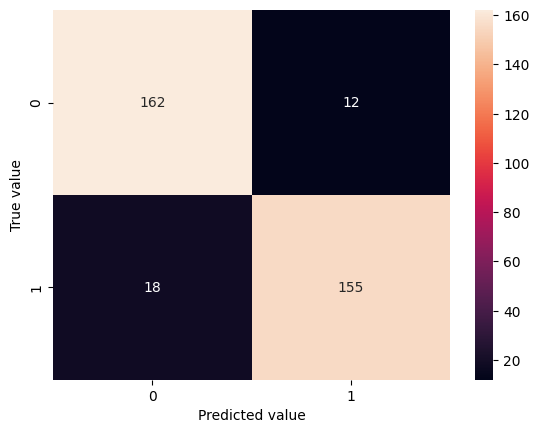

In [100]:
sns.heatmap(cf_matrix, annot=True, fmt="g")
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

0 $\longrightarrow$ True Job Offer  
1 $\longrightarrow$ Fake Job Offer

**Metrics are very similar, which means no overfitting.**  
**Out of 173 fake job offers in the test data, 155 are correctly classified as such.**  
**In this case 90% of F1 Score will be considered acceptable.**

## Predictive System

In [101]:
# Test for 0
input_offer = job_data.iloc[0, :]
print(input_offer)
# Test for 1
#input_offer = job_data.iloc[98, :]
# Dropping columns (use labels in panda Series)
input_offer_filtered = input_offer.drop(labels=['job_id', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 'industry', 'function'])
# Removing NaN
input_offer_filtered = input_offer_filtered.where((pd.notnull(input_offer_filtered)), '')
# Getting the country
input_offer_filtered['location'] = get_country(input_offer_filtered['location'])
# has_questions to string
input_offer_filtered['has_questions'] = str(input_offer_filtered['has_questions'])
# Creating text column
input_offer_filtered['text'] = input_offer_filtered['title'] + ' - ' + input_offer_filtered['location'] + ' - ' + input_offer_filtered['company_profile'] + ' - ' + input_offer_filtered['description'] + ' - ' + input_offer_filtered['requirements'] +  ' - ' + input_offer_filtered['benefits'] + ' - ' + input_offer_filtered['has_questions'] + ' - ' + input_offer_filtered['employment_type'] + ' - ' + input_offer_filtered['required_experience'] + ' - ' + input_offer_filtered['required_education']


job_id                                                                 1
title                                                   Marketing Intern
location                                                US, NY, New York
department                                                     Marketing
salary_range                                                         NaN
company_profile        We're Food52, and we've created a groundbreaki...
description            Food52, a fast-growing, James Beard Award-winn...
requirements           Experience with content management systems a m...
benefits                                                             NaN
telecommuting                                                          0
has_company_logo                                                       1
has_questions                                                          0
employment_type                                                    Other
required_experience                                

In [102]:
# Prediction features
X_prediction_features = feature_extraction.transform([input_offer_filtered['text']])

In [103]:
prediction = model.predict(X_prediction_features)

In [104]:
if prediction[0] == 0:
    print("True job offer")
else:
    print("Fake job offer")

True job offer


## Files for Django App

In [105]:
# List of possible countries from dataframe
clean_job_data['location'].unique().tolist()

['US',
 'NZ',
 'DE',
 'GB',
 'AU',
 'SG',
 'IL',
 'AE',
 'CA',
 'IN',
 'EG',
 'PL',
 'GR',
 '',
 'PK',
 'BE',
 'BR',
 'SA',
 'DK',
 'RU',
 'ZA',
 'CY',
 'HK',
 'TR',
 'IE',
 'LT',
 'JP',
 'NL',
 'AT',
 'KR',
 'FR',
 'EE',
 'TH',
 'PA',
 'KE',
 'MU',
 'MX',
 'RO',
 'MY',
 'FI',
 'CN',
 'ES',
 'SE',
 'CL',
 'UA',
 'QA',
 'IT',
 'LV',
 'IQ',
 'BG',
 'PH',
 'CZ',
 'VI',
 'MT',
 'HU',
 'BD',
 'KW',
 'LU',
 'NG',
 'RS',
 'BY',
 'VN',
 'ID',
 'ZM',
 'NO',
 'BH',
 'UG',
 'CH',
 'TT',
 'SD',
 'SK',
 'AR',
 'TW',
 'PT',
 'PE',
 'CO',
 'IS',
 'SI',
 'MA',
 'AM',
 'TN',
 'GH',
 'AL',
 'HR',
 'CM',
 'SV',
 'NI',
 'LK',
 'JM',
 'KZ',
 'KH']

In [106]:
# replacing empty string with UNKNOWN/OTHER
possible_countries = np.where(clean_job_data['location'].unique() == "", "UNKNOWN/OTHER", clean_job_data['location'].unique())
print(possible_countries)

['US' 'NZ' 'DE' 'GB' 'AU' 'SG' 'IL' 'AE' 'CA' 'IN' 'EG' 'PL' 'GR'
 'UNKNOWN/OTHER' 'PK' 'BE' 'BR' 'SA' 'DK' 'RU' 'ZA' 'CY' 'HK' 'TR' 'IE'
 'LT' 'JP' 'NL' 'AT' 'KR' 'FR' 'EE' 'TH' 'PA' 'KE' 'MU' 'MX' 'RO' 'MY'
 'FI' 'CN' 'ES' 'SE' 'CL' 'UA' 'QA' 'IT' 'LV' 'IQ' 'BG' 'PH' 'CZ' 'VI'
 'MT' 'HU' 'BD' 'KW' 'LU' 'NG' 'RS' 'BY' 'VN' 'ID' 'ZM' 'NO' 'BH' 'UG'
 'CH' 'TT' 'SD' 'SK' 'AR' 'TW' 'PT' 'PE' 'CO' 'IS' 'SI' 'MA' 'AM' 'TN'
 'GH' 'AL' 'HR' 'CM' 'SV' 'NI' 'LK' 'JM' 'KZ' 'KH']


In [107]:
# converting to list
possible_countries_as_list = possible_countries.tolist()
print(possible_countries_as_list)

['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG', 'PL', 'GR', 'UNKNOWN/OTHER', 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY', 'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH', 'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL', 'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU', 'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH', 'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS', 'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK', 'JM', 'KZ', 'KH']


In [108]:
# Possible employment types
clean_job_data['employment_type'].unique()

array(['Other', 'Full-time', '', 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [109]:
# Replacing empty string
possible_employment_types = np.where(clean_job_data['employment_type'].unique() == "", "UNKNOWN", clean_job_data['employment_type'].unique())

In [110]:
possible_employment_types_as_list = possible_employment_types.tolist()
print(possible_employment_types_as_list)

['Other', 'Full-time', 'UNKNOWN', 'Part-time', 'Contract', 'Temporary']


In [111]:
# Possible required experience

In [112]:
clean_job_data['required_experience'].unique()

array(['Internship', 'Not Applicable', '', 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [113]:
# Replacing empty string
possible_required_experience = np.where(clean_job_data['required_experience'].unique() == "", "UNKNOWN/OTHER", clean_job_data['required_experience'].unique())

In [114]:
possible_required_experience_as_list = possible_required_experience.tolist()
print(possible_required_experience_as_list)

['Internship', 'Not Applicable', 'UNKNOWN/OTHER', 'Mid-Senior level', 'Associate', 'Entry level', 'Executive', 'Director']


In [115]:
# Possible required education
clean_job_data['required_education'].unique()

array(['', "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [116]:
# Replacing empty string
possible_required_education = np.where(clean_job_data['required_education'].unique() == "", "UNKNOWN/OTHER", clean_job_data['required_education'].unique())

In [117]:
possible_required_education_as_list = possible_required_education.tolist()
print(possible_required_education_as_list)

['UNKNOWN/OTHER', "Bachelor's Degree", "Master's Degree", 'High School or equivalent', 'Unspecified', 'Some College Coursework Completed', 'Vocational', 'Certification', 'Associate Degree', 'Professional', 'Doctorate', 'Some High School Coursework', 'Vocational - Degree', 'Vocational - HS Diploma']


In [118]:
form_input_data = {
    'possible_locations': possible_countries_as_list,
    'possible_employment_types': possible_employment_types_as_list,
    'possible_required_experience': possible_required_experience_as_list,
    'possible_required_education': possible_required_education_as_list
}

In [119]:
pd.to_pickle(form_input_data,'form_input_data.pickle')

In [120]:
pd.to_pickle(model,'prediction_model.pickle')

In [121]:
pd.to_pickle(feature_extraction, 'feature_extraction.pickle')

In [123]:
# csv with semicolon for easier testing
job_data.to_csv(sep=';', path_or_buf='dataset/fake_job_data_semicolon.csv', index=False)